In [58]:
#This is the notebook for ASTR 19 Group Project.


In [59]:
#import basics
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import tensorflow as tf
from scipy import stats

In [60]:
#Upload text data
#named the text fname, to make calling it easier.
fname = 'ASTR19_S22_group_project_data.txt'
#data = np.genfromtxt(fname, dtype=None) #another variation to call, text, ignore.
data = np.loadtxt(fname,dtype=np.ndarray) #loaded the data as an array, named it data.
print(data)

[['1' '8:07' '6.57']
 ['1' '15:37' '-0.39']
 ['2' '8:55' '5.38']
 ['2' '16:25' '-1.74']
 ['3' '9:45' '5.26']
 ['3' '17:14' '-1.36']
 ['4' '10:35' '4.13']
 ['4' '18:00' '-1.15']
 ['5' '11:28' '3.48']
 ['5' '18:46' '-1.61']
 ['6' '12:22' '2.62']
 ['6' '19:31' '0.05']
 ['7' '13:24' '1.83']
 ['7' '20:16' '1.01']
 ['8' '3:22' '3.57']
 ['8' '21:01' '0.73']
 ['9' '4:07' '4.54']
 ['9' '21:46' '2.17']
 ['10' '4:50' '3.76']
 ['10' '11:58' '2.88']
 ['11' '5:31' '3.90']
 ['11' '12:56' '1.92']
 ['12' '6:08' '4.73']
 ['12' '13:45' '1.74']
 ['13' '6:47' '5.66']
 ['13' '14:25' '0.79']
 ['14' '7:22' '5.33']
 ['14' '15:00' '-0.04']
 ['15' '7:59' '5.23']
 ['15' '15:34' '-1.12']
 ['16' '8:34' '6.67']
 ['16' '16:08' '-0.61']
 ['17' '9:10' '4.74']
 ['17' '16:41' '-0.93']
 ['18' '9:45' '4.69']
 ['18' '17:12' '-1.29']
 ['19' '10:21' '4.20']
 ['19' '17:45' '0.22']
 ['20' '10:57' '3.68']
 ['20' '18:15' '0.26']
 ['21' '11:38' '2.47']
 ['21' '18:48' '0.36']
 ['22' '12:25' '2.59']
 ['22' '19:20' '0.99']
 ['23' '2:

In [61]:
x = []
y = []

for entry in data:
    time = float(entry[1].replace(":", "")) / 2400.0
    date = float(entry[0]) + time
    
    x.append(date)
    y.append(float(entry[2]))

x = np.array(x)
y = np.array(y)

[ 1.33625     1.64041667  2.35625     2.67708333  3.39375     3.71416667
  4.43125     4.75        5.47        5.76916667  6.50916667  6.80458333
  7.55166667  7.84        8.13416667  8.87541667  9.16958333  9.89416667
 10.1875     10.4825     11.22125    11.52333333 12.25333333 12.56041667
 13.26958333 13.59375    14.30083333 14.625      15.31625    15.63916667
 16.3475     16.67       17.37916667 17.68375    18.39375    18.71333333
 19.42541667 19.72708333 20.44041667 20.75625    21.47416667 21.77
 22.51041667 22.8        23.0925     23.81333333 24.1075     24.84583333
 25.14041667 25.435      26.17625    26.48125    27.21458333 27.52375
 28.25375    28.5625     29.29375    29.59958333 30.31583333 30.63625
 31.35416667 31.67083333 32.39166667 32.68833333 33.42916667 33.7225
 34.46625    34.755      35.50416667 35.77041667 36.055      36.80166667
 37.08875    37.83333333 38.10583333 38.3975     39.14125    39.46458333
 40.17875    40.50916667 41.21708333 41.5475    ]
[ 6.57 -0.39  5.3

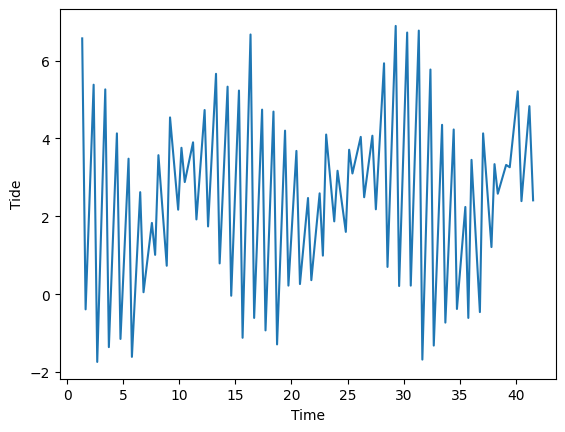

In [62]:
plt.plot(x, y)

plt.xlabel("Time")
plt.ylabel("Tide")
print(x)
print(y)

Text(0, 0.5, 'Tide')

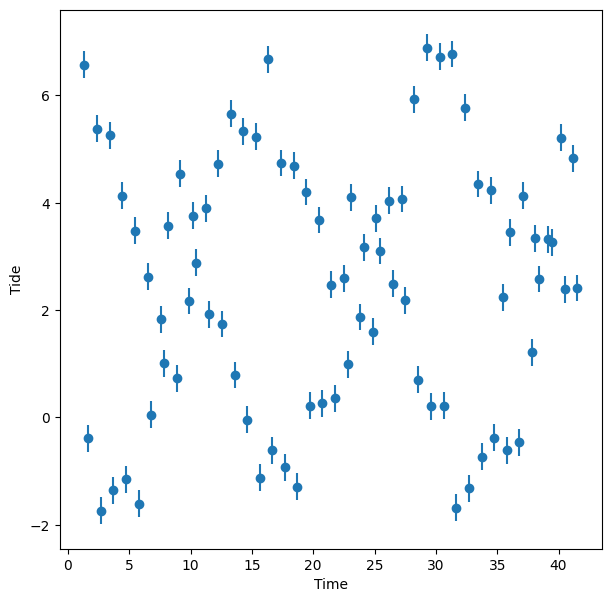

In [63]:
npoints = len(data)

sig = 0.25

y_err = np.full(npoints, sig)

f = plt.figure(figsize=(7, 7))

plt.errorbar(x, y, yerr=y_err, fmt="o")
plt.xlabel("Time")
plt.ylabel("Tide")

2.0000000000000004 30.09912145181257 2.0000000000000004 2.359817688402631
2.0000000000000004
30.09912145181257
2.0000000000000004
2.359817688402631


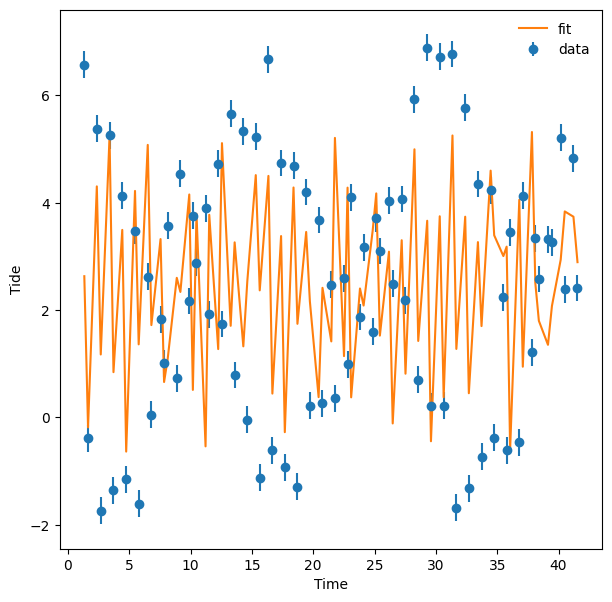

In [64]:
a = 2.0 #increases vertical size
b = 30.0 #increases horizontal squish
c = 2.0 #increases horizontal squish
d = 2.0 #raises it up
bounds = ([], [])

def guess(x, a, b, c, d):
    return a * np.sin(b * x) + np.cos(c * x) + d

params, params_cov = optimize.curve_fit(guess, x, y, sigma=y_err, p0=[a, b, c, d], bounds=([2, 29.0, 2.0, 2.0], [10, 35.0, 3.0, 3.0]))

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit, b_fit, c_fit, d_fit)

y_fit = guess(x, a_fit, b_fit, c_fit, d_fit)

f = plt.figure(figsize=(7, 7))
print(a_fit)
print(b_fit)
print(c_fit)
print(d_fit)

plt.errorbar(x, y, yerr=y_err, fmt="o", label="data")
plt.plot(x, y_fit, label="fit")
#plt.plot(x, guess(x, a, b, c, d), label="fit")
plt.xlabel("Time")
plt.ylabel("Tide")
plt.legend(loc=0, frameon=False)

In [65]:
#lets try the training. 

#amplitude
A_init = 2.0
A_fit = tf.Variable(A_init,name='amplitude')

#frequency
B_init = 5.0
B_fit = tf.Variable(B_init,name='frequency')

#phase
C_init = 0.5
C_fit = tf.Variable(C_init,name='phase')

D_init = 2.0
D_fit = tf.Variable(D_init,name='huh')



In [66]:
#define the model for tensorflow to fit
#a * np.sin(b * x) + np.cos(c * x) + d
@tf.function
def our_model(j):
    return A_fit * tf.math.sin(B_fit * j) + tf.math.cos(C_fit * j) + D_fit

In [67]:
#define the loss function
@tf.function
def mse(y_true,y_pred):
    #mse (mean squared error) between true and predicted values
    return tf.losses.mean_squared_error(y_true,y_pred)

In [68]:
#Adam Optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

In [69]:
#start training
j = np.asarray(np.random.uniform(low=0,high=40,size=82),dtype=np.float32)
epochs = 5000 #number of epochs to run
display_step = 1000 #number of epochs between printing info to screen

for epoch in range(epochs):

    #monitor training / display steps
    if((epoch%display_step)==0):
        pred=our_model(j)
        loss=mse(pred,y)

        #to print this info, we need to convert to numpy arrays
        print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} B: {B_fit.numpy()} C:{C_fit.numpy()}")

    #In TF2, gradients are handled using the GradientTape class.
    #begin gradienttape and optimize
    with tf.GradientTape() as g:
        pred = our_model(j)
        loss = mse(y,pred)

    #compute dm, db, the gradients with respect to m_fit and b_fit
    gradients = g.gradient(loss, [A_fit,B_fit,C_fit])

    #update m_fit anf b_fit with the gradients x learning
    optimizer.apply_gradients(zip(gradients,[A_fit,B_fit,C_fit]))

#print the last answer
print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} B: {B_fit.numpy()} C:{C_fit.numpy()}")
print("Done!")

Epoch 0 | Loss 7.37092139858627, A: 2.0 B: 5.0 C:0.5
Epoch 1000 | Loss 6.249150118800835, A: 1.136359691619873 B: 5.001923561096191 C:0.4610932767391205
Epoch 2000 | Loss 5.956464051578237, A: 0.5743923783302307 B: 5.005328178405762 C:0.4578748345375061
Epoch 3000 | Loss 5.809912516803482, A: 0.49478229880332947 B: 5.0977911949157715 C:0.4563111364841461
Epoch 4000 | Loss 5.809750495323127, A: 0.5120801329612732 B: 5.097870349884033 C:0.4563670754432678
Epoch 4999 | Loss 5.809751033782959, A: 0.5127393007278442 B: 5.097873210906982 C:0.45636922121047974
Done!


In [70]:
x_model = np.sort(j)
y_model = guess(x_model,A_fit,B_fit,C_fit,D_fit)

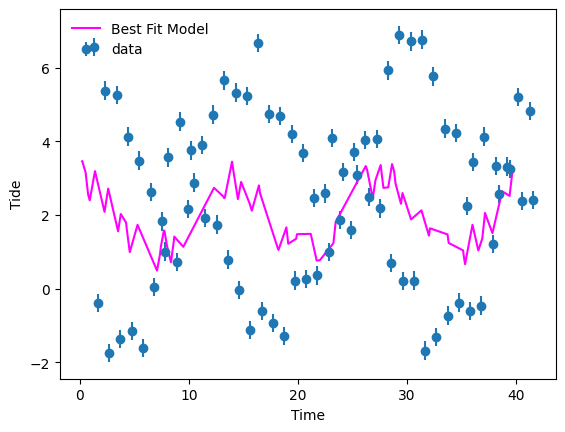

In [71]:
#plot again
plt.errorbar(x, y, yerr=y_err, fmt="o", label="data")
#plt.plot(x, y_fit, label="fit")
plt.plot(x_model,y_model,color='magenta',label='Best Fit Model')
plt.xlabel("Time")
plt.ylabel("Tide")
plt.legend(loc=0, frameon=False)

In [72]:
#3 subtract off the best fit function for residuals
residuals = y - y_fit
print(y_fit)

[ 2.63113528 -0.1851282   4.30485479  1.1728117   5.23310248  0.84339217
  3.49393912 -0.63655017  4.21994573  1.36160922  5.07788838  1.72041938
  3.32300936  0.66003616  1.090058    2.60122123  2.33775978  4.1539129
  0.51275629  3.79521693 -0.53922536  3.7754667   1.27330304  5.11066824
  1.70695462  3.26202448  1.3242918   2.53487113  4.51475399  2.36752375
  4.50016157  0.44412352  3.37940824 -0.27490209  4.28414123  1.744162
  3.45580043  2.16286894  0.37803206  2.41457603  1.41641968  5.20824135
  1.14224032  4.28131883  0.37401466  2.4023122   2.08471121  3.47617182
  4.1740791   1.52444182  3.08870316 -0.11232875  3.30139096  0.81454929
  4.99569598  1.42481764  3.66442381 -0.44414593  3.74788885  0.3757167
  5.25334378  1.27622164  3.73976141  0.45068652  3.26651424  1.70188684
  4.59809606  3.39354757  3.00650597  3.18199949 -0.59098732  4.05611504
  0.94512925  5.31803936  2.51183872  1.80026572  1.35275908  2.07756822
  2.93881474  3.83818144  3.73979294  2.89286138]


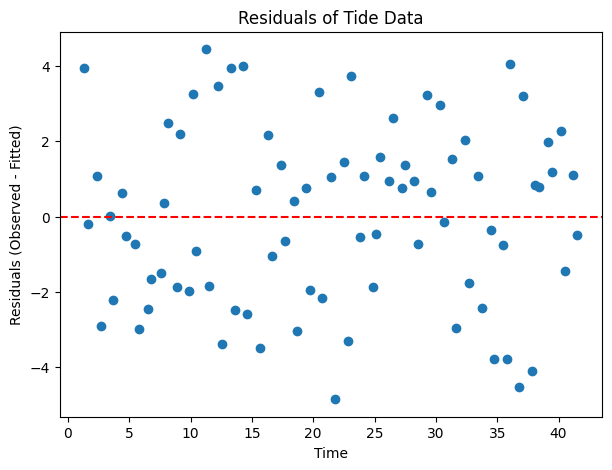

In [73]:
# plot the residuals
plt.figure(figsize=(7, 5))
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Residuals (Observed - Fitted)")
plt.title("Residuals of Tide Data")
plt.show()

In [74]:
# measure standard deviation
std_dev_residuals = np.std(residuals)
print("Standard Deviation of Residuals:", std_dev_residuals)

Standard Deviation of Residuals: 2.332249868658801


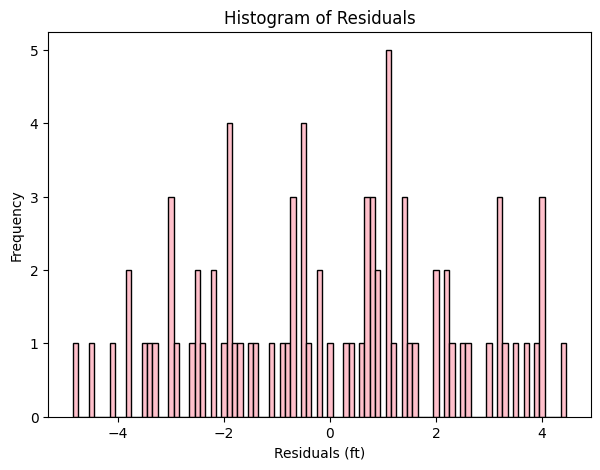

In [75]:
# plot a histogram
plt.figure(figsize=(7, 5))
bin_width = 0.1  # reasonable bin widths
bins = np.arange(min(residuals), max(residuals) + bin_width, bin_width)
plt.hist(residuals, bins=bins, color='pink', edgecolor='black')
plt.xlabel("Residuals (ft)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.savefig("./histogram.pdf")

In [76]:
#4
#Go to the original data, add 2 ft to early morning day 14.
data0 = np.copy(data)
data0[data0 == str(5.33)] = str(7.33)
#print(data)
#print(data0)

x0 = []
y0 = []

for entry in data0:
    time = float(entry[1].replace(":", "")) / 2400.0
    date = float(entry[0]) + time

    x0.append(date)
    y0.append(float(entry[2]))
    #print(float(entry[2]))

x0 = np.array(x0)
y0 = np.array(y0)
#x0 doesn't matter, care about y0. 

#create new y_fit
params0, params_cov0 = optimize.curve_fit(guess,x,y0,sigma=y_err,p0=[a,b,c,d],bounds=bounds)
a_fit0 = params0[0]
b_fit0 = params0[1]
c_fit0 = params0[2]
d_fit0 = params0[3]

y_fit0 = guess(x, a_fit0, b_fit0, c_fit0, d_fit0)

y0_residuals = y0 - y_fit0
y0_std = np.std(y0_residuals)

Text(0.5, 1.0, 'Histogram of Residuals')

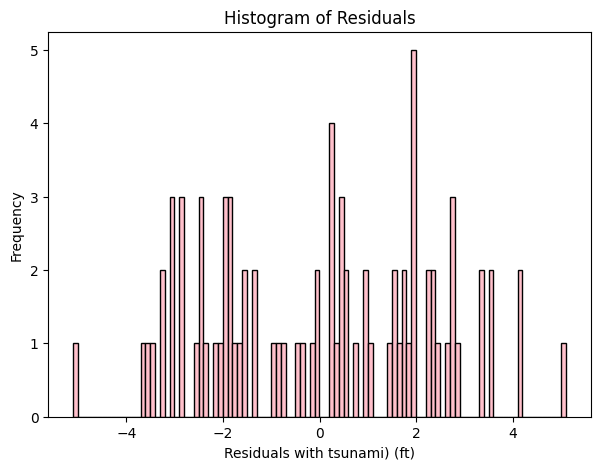

In [77]:
#replot with this 
plt.figure(figsize=(7, 5))
bin_width = 0.1  # reasonable bin widths
bins = np.arange(min(y0_residuals), max(y0_residuals) + bin_width, bin_width)
plt.hist(y0_residuals, bins=bins, color='pink', edgecolor='black')
plt.xlabel("Residuals with tsunami) (ft)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")

In [78]:
#How large of a deviation was this tsunami?
#using z score, which tells us how many standard deviations away a value is from the mean 
print(stats.zscore(y0))
print(y0[26])
print("The tsunami was 1.9950412 deviations away from the mean.")

[ 1.68094721 -1.19549256  1.18914213 -1.75342268  1.13954834 -1.59637568
  0.67254016 -1.50958655  0.40390714 -1.69969608  0.04848498 -1.01364866
 -0.27800746 -0.61689835  0.44110248 -0.73261719  0.84198561 -0.13749172
  0.51962598  0.15593819  0.5774854  -0.24081212  0.92050911 -0.3152028
  1.30486097 -0.7078203   1.9950412  -1.05084401  1.1271499  -1.49718811
  1.72227536 -1.2864145   0.92464192 -1.41866461  0.90397785 -1.56744597
  0.70146987 -0.9433908   0.48656345 -0.92685953 -0.01350725 -0.88553138
  0.03608654 -0.62516398  0.66014172 -0.2614762   0.27578985 -0.37306222
  0.4989619   0.24686014  0.63534482 -0.00524162  0.64774327 -0.13335891
  1.416447   -0.74501564  1.81319731 -0.94752361  1.74293944 -0.9433908
  1.76360352 -1.72862579  1.35032195 -1.57984442  0.76346211 -1.33600829
  0.71386832 -1.19135974 -0.10856201 -1.2864145   0.39150869 -1.22442227
  0.67254016 -0.53424204  0.34604772  0.03195372  0.33778209  0.31298519
  1.11888426 -0.04656978  0.96183727 -0.03830415]
7.3